# Component FDTD simulations

## Lumerical FDTD

You can write the [Sparameters](https://en.wikipedia.org/wiki/Scattering_parameters) for all components in the UBC `ubcpdk.components` PDK using lumerical FDTD plugin in gdsfactory

2022-06-22 20:37:33.560 | INFO     | gdsfactory.config:<module>:52 - Load '/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/gdsfactory' 5.10.15


2022-06-22 20:37:35.591 | INFO     | ubcpdk:<module>:36 - Found UBCpdk '1.6.4' installed at PosixPath('/home/runner/work/ubc/ubc/ubcpdk')


straight_add_fiber_arra_e1feec4c


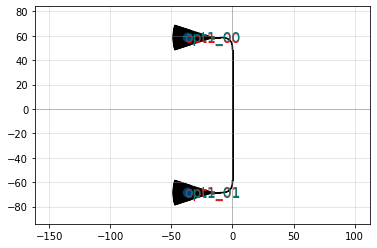

bend_euler


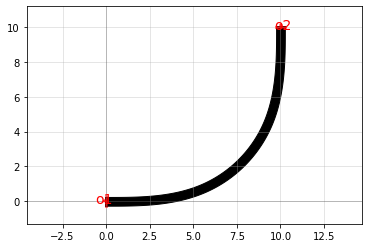

coupler_10c87d3e_copy


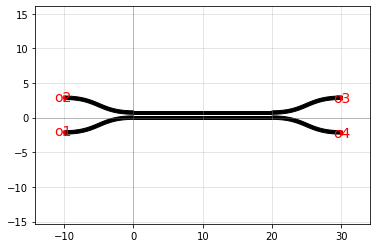

ebeam_crossing4


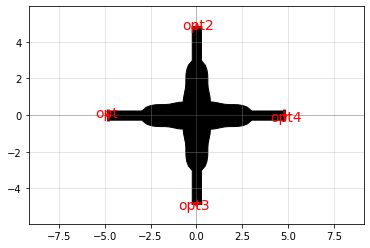

dbr


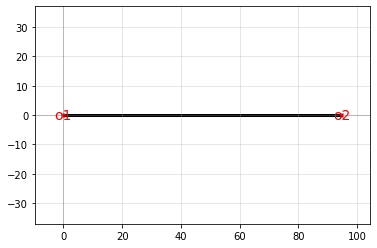

dbr_cavity_ace99022


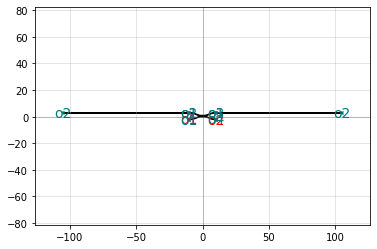

ebeam_adiabatic_te1550


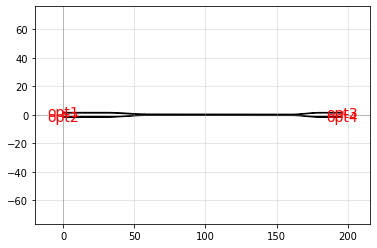

ebeam_bdc_te1550

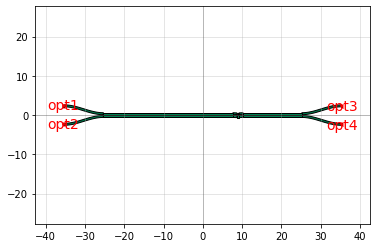

ebeam_bdc_tm1550


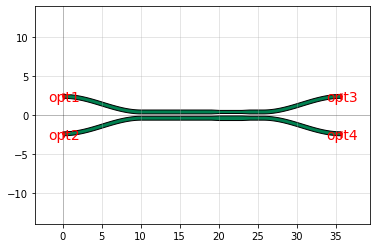

coupler_copy


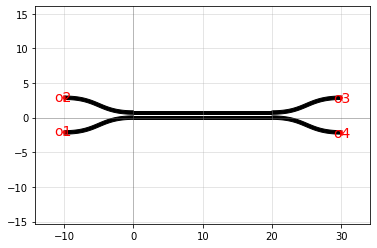

rotate_5cce45cb


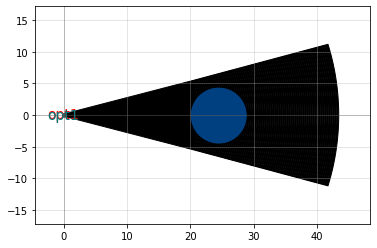

rotate_4953e822


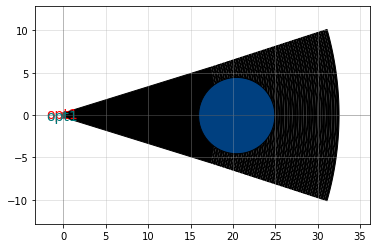

rotate_c698eecd


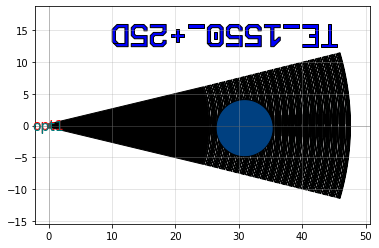

rotate_b1da435a


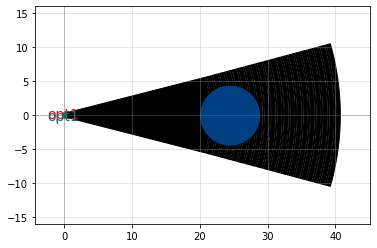

mzi_599c7ad0


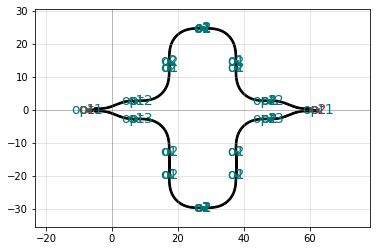

pad_layerWG


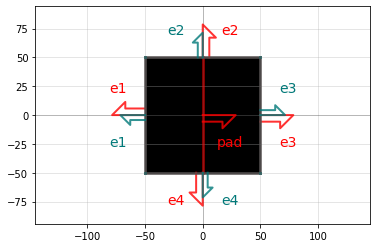

ring_single_e75e1864


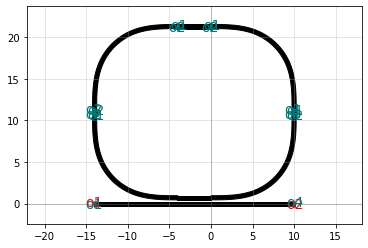

ring_single_dut_0ab86d4f


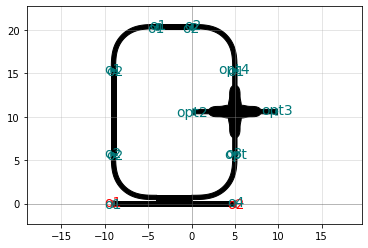

spiral_external_io


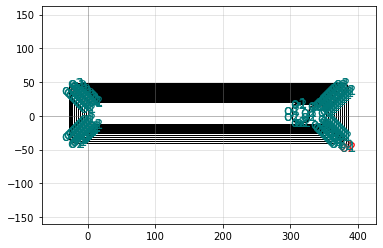

straight


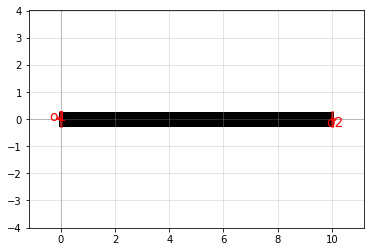

ebeam_y_adiabatic


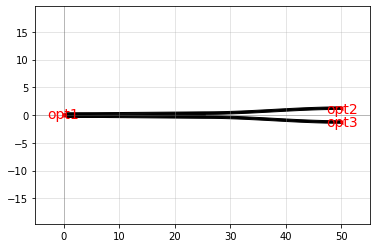

ebeam_y_1550


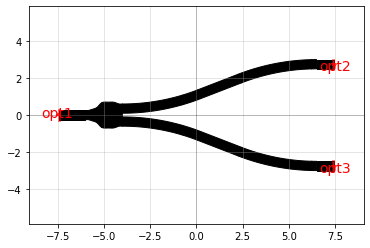

In [1]:
import ubcpdk
import gdsfactory.simulation as sim
import matplotlib.pyplot as plot

for cell in ubcpdk.cells.values():
    component = cell()
    print(component.name)
    component.plot()
    # ubcpdk.tech.write_sparameters_lumerical(component=component)

In [2]:
# df = ubcpdk.tech.get_sparameters_data_lumerical(component=ubcpdk.components.straight())

In [3]:
# sim.plot_sparameters(df)

## Meep

Meep in an open source FDTD library developed at MIT. 
See [docs](https://meep.readthedocs.io/en/latest/Python_Tutorials/GDSII_Import/) and [code](https://github.com/NanoComp/meep).

We will use the gdsfactory meep plugin to run simulation using meep.


Notice that most examples run with `resolution=20` so they run fast.

The resolution is in pixels/um so i reccommend that you run with at least `resolution=100` for 1/100 um/pixel (10 nm/ pixel)

In [4]:
import gdsfactory.simulation.gmeep as gm

2022-06-22 20:37:43.360 | INFO     | gdsfactory.simulation.gmeep:<module>:28 - Meep '1.23.0' installed at ['/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/meep']


Using MPI version 4.0, 1 processes


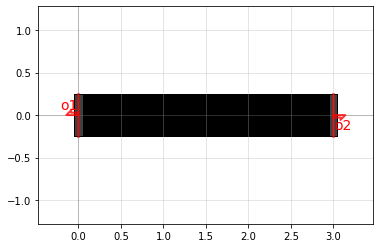

straight_length3: uid 147, ports ['o1', 'o2'], aliases [], 4 polygons, 0 references

In [5]:
c = ubcpdk.components.straight(length=3)
c

/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/meep/__init__.py:4472: ComplexWarning: Casting complex values to real discards the imaginary part
  return _meep._get_epsilon_grid(gobj_list, mlist, _default_material, _ensure_periodicity, gv, cell_size, cell_center, nx, xtics, ny, ytics, nz, ztics, grid_vals, frequency)


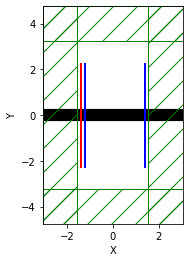

In [6]:
df = gm.write_sparameters_meep_1x1(component=c, run=False)

In [7]:
df = gm.write_sparameters_meep_1x1(component=c, run=True)

2022-06-22 20:37:43.987 | INFO     | gdsfactory.simulation.gmeep.write_sparameters_meep:write_sparameters_meep:345 - Simulation loaded from PosixPath('/home/runner/work/ubc/ubc/sparameters/straight_length3_4f6248eb.csv')


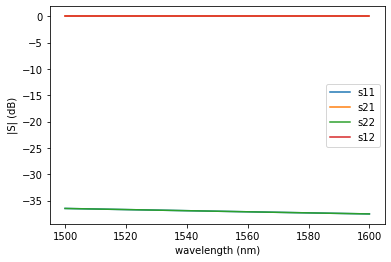

In [8]:
gm.plot.plot_sparameters(df)

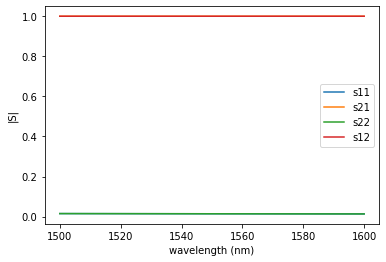

In [9]:
gm.plot.plot_sparameters(df, logscale=False)

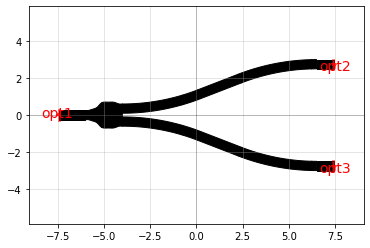

ebeam_y_1550: uid 58, ports ['opt1', 'opt2', 'opt3'], aliases [], 18 polygons, 0 references

In [10]:
c = ubcpdk.components.y_splitter()
c

/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/gdsfactory/simulation/gmeep/get_simulation.py:152: UserWarning: port_source_name='o1' not in ['opt1', 'opt2', 'opt3']
  warnings.warn(f"port_source_name={port_source_name!r} not in {port_names}")
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/gdsfactory/simulation/gmeep/get_simulation.py:155: UserWarning: Selecting port_source_name='opt1' instead.
  warnings.warn(f"Selecting port_source_name={port_source_name!r} instead.")
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/gdsfactory/simulation/gmeep/get_simulation.py:158: UserWarning: port_field_monitor_name='o2' not in ['opt1', 'opt2', 'opt3']
  warnings.warn(
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/gdsfactory/simulation/gmeep/get_simulation.py:167: UserWarning: Selecting port_field_monitor_name='opt2' instead.
  warnings.warn(
/usr/share/miniconda/envs/anaconda-client-env/lib/p

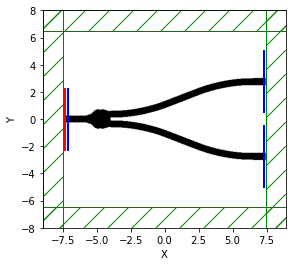

In [11]:
df = gm.write_sparameters_meep(component=ubcpdk.components.y_splitter(), run=False) # lr stands for left-right ports

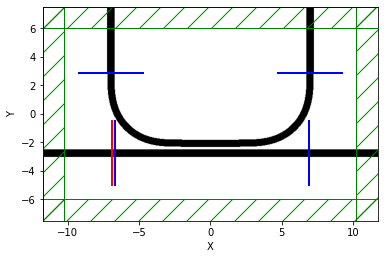

In [12]:
import gdsfactory as gf

df = gm.write_sparameters_meep(gf.components.coupler_ring(), xmargin=3, ymargin_bot=3, run=False) # lr stands for left-right ports